In [48]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as DTC
from matplotlib import pyplot as plt
%matplotlib inline
import datetime
import pandas as pd
from sklearn import preprocessing as pp
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils

In [49]:
ds = pd.read_csv('../Dataset/train.csv')
dat = ds.values
print(dat.shape)

headers = list(ds.columns.values) #store features of mushrooms


(8124, 23)


In [50]:
#Data Preprocessing
l = pp.LabelEncoder()
l.fit(dat[:, 0])
dataa = l.transform(dat[:, 0])

for ix in range(1, dat.shape[1]):
    le = pp.LabelEncoder()
    le.fit(dat[:, ix])
    y = le.transform(dat[:, ix])
    dataa = np.vstack((dataa , y))

data = dataa.T

cate = data[:, 0]

data.shape


(8124, 23)

In [52]:

split = int(0.80 * data.shape[0])

x_train = data[:split , 1:]
y_train = data[:split, 0]

x_test = data[split: , 1:]
y_test = data[split: , 0]

x_train.shape, y_train.shape


((6499, 22), (6499,))

In [53]:
x_test.shape, y_test.shape

((1625, 22), (1625,))

In [55]:
y = np_utils.to_categorical(cate)
Y_train = y[:split]
Y_test = y[split:]

print(x_train.shape, x_test.shape)
print (y_train.shape, y_test.shape)
print (data.shape)

(6499, 22) (1625, 22)
(6499,) (1625,)
(8124, 23)


In [60]:
model = Sequential()

model.add(Dense(11, input_shape=(22,)))
model.add(Activation('relu'))

model.add(Dense(5))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 11)                253       
                                                                 
 activation_3 (Activation)   (None, 11)                0         
                                                                 
 dense_9 (Dense)             (None, 5)                 60        
                                                                 
 activation_4 (Activation)   (None, 5)                 0         
                                                                 
 dense_10 (Dense)            (None, 2)                 12        
                                                                 
 activation_5 (Activation)   (None, 2)                 0         
                                                                 
Total params: 325
Trainable params: 325
Non-trainable 

In [61]:
hist = model.fit(x_train, Y_train,
                 epochs=70,
                 shuffle=True,
                 batch_size=128,
                 validation_data=(x_test, Y_test))

Epoch 1/70
51/51 [==============================] - 1s 6ms/step - loss: 0.7444 - acc: 0.6684 - val_loss: 0.5115 - val_acc: 0.7557
Epoch 2/70
51/51 [==============================] - 0s 2ms/step - loss: 0.5418 - acc: 0.7453 - val_loss: 0.4733 - val_acc: 0.7483
Epoch 3/70
51/51 [==============================] - 0s 2ms/step - loss: 0.4792 - acc: 0.7818 - val_loss: 0.4275 - val_acc: 0.7668
Epoch 4/70
51/51 [==============================] - 0s 2ms/step - loss: 0.4256 - acc: 0.8164 - val_loss: 0.3826 - val_acc: 0.8172
Epoch 5/70
51/51 [==============================] - 0s 2ms/step - loss: 0.3738 - acc: 0.8429 - val_loss: 0.3438 - val_acc: 0.8382
Epoch 6/70
51/51 [==============================] - 0s 2ms/step - loss: 0.3254 - acc: 0.8731 - val_loss: 0.3371 - val_acc: 0.8375
Epoch 7/70
51/51 [==============================] - 0s 2ms/step - loss: 0.2793 - acc: 0.8986 - val_loss: 0.3338 - val_acc: 0.8505
Epoch 8/70
51/51 [==============================] - 0s 2ms/step - loss: 0.2399 - acc: 0.91

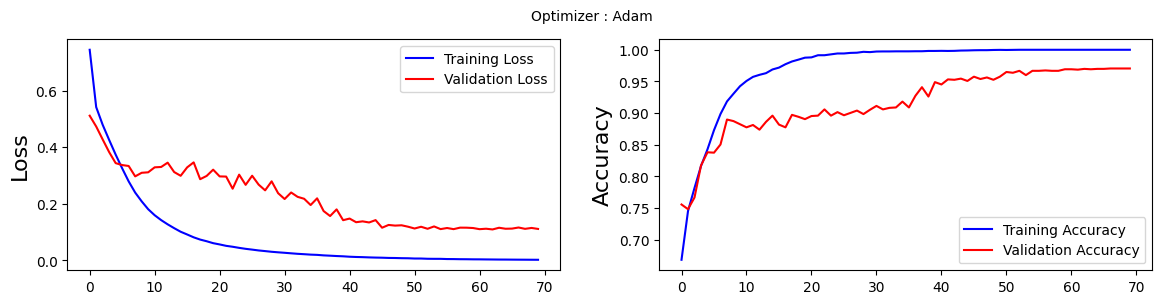

In [62]:
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], 'b', label='Training Loss')
plt.plot(hist.history['val_loss'], 'r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['acc'], 'b', label='Training Accuracy')
plt.plot(hist.history['val_acc'], 'r', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [64]:
Test_df=pd.read_csv("../Dataset/test.csv")
Test_p = Test_df.copy()
Test_p.drop(['index'], axis=1, inplace=True)
Test_p.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 2000 non-null   object
 1   cap-surface               2000 non-null   object
 2   cap-color                 2000 non-null   object
 3   bruises                   2000 non-null   object
 4   odor                      2000 non-null   object
 5   gill-attachment           2000 non-null   object
 6   gill-spacing              2000 non-null   object
 7   gill-size                 2000 non-null   object
 8   gill-color                2000 non-null   object
 9   stalk-shape               2000 non-null   object
 10  stalk-root                2000 non-null   object
 11  stalk-surface-above-ring  2000 non-null   object
 12  stalk-surface-below-ring  2000 non-null   object
 13  stalk-color-above-ring    2000 non-null   object
 14  stalk-color-below-ring  

In [67]:
y_pred = model.predict(Test_p)

UnimplementedError: Graph execution error:

Detected at node 'sequential_2/Cast' defined at (most recent call last):
    File "C:\Users\Piyush\anaconda3\envs\MLnewConda\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Piyush\anaconda3\envs\MLnewConda\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\Piyush\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Piyush\AppData\Roaming\Python\Python310\site-packages\traitlets\config\application.py", line 982, in launch_instance
      app.start()
    File "C:\Users\Piyush\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\Piyush\AppData\Roaming\Python\Python310\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Piyush\anaconda3\envs\MLnewConda\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\Users\Piyush\anaconda3\envs\MLnewConda\lib\asyncio\base_events.py", line 1899, in _run_once
      handle._run()
    File "C:\Users\Piyush\anaconda3\envs\MLnewConda\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Piyush\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\Piyush\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\Piyush\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\Piyush\AppData\Roaming\Python\Python310\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\Piyush\AppData\Roaming\Python\Python310\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "C:\Users\Piyush\AppData\Roaming\Python\Python310\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Piyush\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "C:\Users\Piyush\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "C:\Users\Piyush\AppData\Roaming\Python\Python310\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Piyush\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Piyush\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Piyush\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Piyush\AppData\Local\Temp\ipykernel_29880\1498064198.py", line 1, in <module>
      y_pred = model.predict(Test_p)
    File "C:\Users\Piyush\anaconda3\envs\MLnewConda\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Piyush\anaconda3\envs\MLnewConda\lib\site-packages\keras\engine\training.py", line 2033, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Users\Piyush\anaconda3\envs\MLnewConda\lib\site-packages\keras\engine\training.py", line 1845, in predict_function
      return step_function(self, iterator)
    File "C:\Users\Piyush\anaconda3\envs\MLnewConda\lib\site-packages\keras\engine\training.py", line 1834, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Piyush\anaconda3\envs\MLnewConda\lib\site-packages\keras\engine\training.py", line 1823, in run_step
      outputs = model.predict_step(data)
    File "C:\Users\Piyush\anaconda3\envs\MLnewConda\lib\site-packages\keras\engine\training.py", line 1791, in predict_step
      return self(x, training=False)
    File "C:\Users\Piyush\anaconda3\envs\MLnewConda\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Piyush\anaconda3\envs\MLnewConda\lib\site-packages\keras\engine\training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\Piyush\anaconda3\envs\MLnewConda\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Piyush\anaconda3\envs\MLnewConda\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Piyush\anaconda3\envs\MLnewConda\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Piyush\anaconda3\envs\MLnewConda\lib\site-packages\keras\engine\sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "C:\Users\Piyush\anaconda3\envs\MLnewConda\lib\site-packages\keras\engine\functional.py", line 458, in call
      return self._run_internal_graph(
    File "C:\Users\Piyush\anaconda3\envs\MLnewConda\lib\site-packages\keras\engine\functional.py", line 578, in _run_internal_graph
      y = self._conform_to_reference_input(y, ref_input=x)
    File "C:\Users\Piyush\anaconda3\envs\MLnewConda\lib\site-packages\keras\engine\functional.py", line 678, in _conform_to_reference_input
      tensor = tf.cast(tensor, dtype=ref_input.dtype)
Node: 'sequential_2/Cast'
Cast string to float is not supported
	 [[{{node sequential_2/Cast}}]] [Op:__inference_predict_function_77072]